# Analyse questionnaire page accueil BCD

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class DictTable(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=30%>"]
        for key, value in self.items():
            html.append("<tr>")
            html.append("<td><b>{0}</b></td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
def tri_dico(dico):
    return {k: v for k, v in sorted(dico.items(), key=lambda item:item[1], reverse=True)}

In [4]:
df = pd.read_excel('sondageBCD_trad.xlsx')
#cast en type date
df['Date de soumission'] = pd.to_datetime(df['Date de soumission'])

In [186]:
df

,ID de la réponse,Date de soumission,Dernière page,Langue de départ,Tête de série,Date de lancement,Date de la dernière action,Pourriez vous lister les missions de BCD ?,Pourriez-vous nommer les sites animés par BCD ?,"Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?",...,Regardez-vous la page Actualités ?,Regardez-vous le Slider ?,Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 1],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 2],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 3],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 4],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 5],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 6],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 7],Commentaires libres
0,9,2020-03-09 10:46:06,2,fr,1632807564,2020-03-09 10:26:21,2020-03-09 10:46:06,- vulgariser et diffuser la culture et les sav...,Bazhalan becedia bed pci bretania,PCI,...,Oui,Non,Les différentes actions de BCD,Les partenaires,Les projets en cours,Le projet associatif,Les différents sites de BCD,Les salariés de l'association,NaN,NaN
2,11,2020-03-09 14:09:43,2,fr,1583135970,2020-03-09 14:08:48,2020-03-09 14:09:43,NaN,NaN,NaN,...,Non,Non,Les différents sites de BCD,Les différentes actions de BCD,NaN,NaN,NaN,NaN,NaN,NaN
4,13,2020-03-09 18:51:02,2,fr,2081881169,2020-03-09 18:38:34,2020-03-09 18:51:02,Non,Non,Je ne sais pas,...,NaN,Non,Les projets en cours,Le projet associatif,Les différentes actions de BCD,Les différents sites de BCD,Les partenaires,Les comptes rendus des assemblées générales,Les salariés de l'association,"Je n'ai rien à ajouter, je viendrai plus souve..."
5,14,2020-03-10 08:16:39,2,fr,1896966050,2020-03-10 08:08:52,2020-03-10 08:16:39,"Vulgariser, diffuser la matière culturelle et ...",bretania\nbed\npci\nTAP\nBécédia,pci,...,Oui,Oui,Les différentes actions de BCD,Le projet associatif,Les projets en cours,Les salariés de l'association,Les comptes rendus des assemblées générales,Les partenaires,Les différents sites de BCD,NaN
7,16,2020-03-10 11:45:49,2,fr,2145875740,2020-03-10 11:40:51,2020-03-10 11:45:49,Valoriser la culture de Bretagne et la vulgari...,"Bécédia, Bretania,",Bretania,...,Non,Oui,Les différents sites de BCD,Les différentes actions de BCD,Les partenaires,Le projet associatif,Les projets en cours,Les salariés de l'association,Les comptes rendus des assemblées générales,NaN
8,17,2020-03-10 12:08:45,2,fr,669932358,2020-03-10 11:51:51,2020-03-10 12:08:45,Promouvoir la diversité de la culture bretonne...,"BCD, Bécédia, Bretania, PCI et BED.",Bretania et PCI,...,Oui,NaN,Les différents sites de BCD,Les différentes actions de BCD,Les projets en cours,Les partenaires,Le projet associatif,Les salariés de l'association,Les comptes rendus des assemblées générales,Merci de votre sollicitation et plein de succè...
9,18,2020-03-10 17:52:51,2,fr,1631548816,2020-03-10 17:44:01,2020-03-10 17:52:51,-Promouvoir la diversité cuturelle en Bretagne...,"BED , Bretania, Bécédia, Bazhvalan, PCI",Bretania,...,Oui,Oui,Les différents sites de BCD,Les projets en cours,Le projet associatif,Les différentes actions de BCD,Les partenaires,Les salariés de l'association,Les comptes rendus des assemblées générales,Valoriser le rôle et la spécificité des chaque...
11,20,2020-03-11 11:35:56,2,fr,2128116771,2020-03-11 11:16:30,2020-03-11 11:35:55,Les missions BCD sont reprises sur association...,BCD Baltivalan Becedia BED PCI Bretania bien f...,cliquer sur les trois traits en haut à droite,...,Oui,Non,Les différents sites de BCD,Les projets en cours,Le projet associatif,Les différentes actions de 

## données administratives

In [32]:
print(f"Date du premier questionnaire : {df['Date de soumission'].min().strftime('%d/%m/%Y, %H:%M:%S')}")
print(f"Date du dernier questionnaire : {df['Date de soumission'].max().strftime('%d/%m/%Y, %H:%M:%S')}")
print(f"Nombre de réponses : {df.shape[0]}")
complet = df['Dernière page'].value_counts().to_dict()
print(f"Nombre de réponses complètes : {complet[2]}")
print(f"Nombre de réponses incomplètes : {complet[0] + complet[1]}")
print("Les \"réponses incomplètes\" sont vides, on les enlèves donc")

Date du premier questionnaire : 09/03/2020, 10:46:06
Date du dernier questionnaire : 17/03/2020, 16:56:33
Nombre de réponses : 16
Nombre de réponses complètes : 11
Nombre de réponses incomplètes : 5
Les "réponses incomplètes" sont vides, on les enlèves donc


In [36]:
df = df[df['Date de soumission'].notnull()]
l_questions = df.columns
print('Liste des questions :')
for q in l_questions:
    print(f" - {q}")

Liste des questions :
 - ID de la réponse
 - Date de soumission
 - Dernière page
 - Langue de départ
 - Tête de série
 - Date de lancement
 - Date de la dernière action
 - Pourriez vous lister les missions de BCD ?
 - Pourriez-vous nommer les sites animés par BCD ?
 - Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?
 - Si vous aviez des questions sur l'histoire de Bretagne, sur quel site de BCD iriez-vous faire des recherches ?
 - Comment avez-vous trouvé la navigation sur le site de BCD ? Facile, compliqué etc...
 - Pourriez-vous citer une action menée par BCD ?
 - Les termes utilisés sur le site vous paraissent-ils clairs ?
 - Lesquels vous paraissent peu explicites ?
 - Regardez-vous la page Actualités ?
 - Regardez-vous le Slider ?
 - Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 1]
 - Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site

## Q1 : _Pourriez-vous lister les missions de BCD ?_
Les catégories attendues sont :
 - Vulgariser, diffuser la matière culturelle et les savoirs de Bretagne,
 - Réaliser un inventaire permanent du Patrimoine Culturel Immatériel (PCI) breton,
 - Promouvoir la diversité culturelle,
 - Favoriser l’accessibilité et valoriser les contenus culturels et scientifiques relatifs à la Bretagne par le biais des nouvelles technologies de l’information et de la communication.
 
__Il est à noter que sont abordés : la formation, Bretania, public jeune et Bazvalan__

In [85]:
q1 = 'Pourriez vous lister les missions de BCD ?'
print(f"Nombre de réponses : {len(df[q1].dropna())}")

Nombre de réponses : 10


In [87]:
for reponse in df[q1].dropna().values:
    print(reponse)
    print('---')

- vulgariser et diffuser la culture et les savoirs bretons
- réaliser une inventaire du patrimoine culturel immatériel 
- promouvoir la diversité culturelle 
- favoriser l’accès et valoriser les contenus
---
Non
---
Vulgariser, diffuser la matière culturelle et les savoirs de Bretagne,
Réaliser un inventaire permanent du Patrimoine Culturel Immatériel (PCI) breton,
Promouvoir la diversité culturelle,
Favoriser l’accessibilité et valoriser les contenus culturels et scientifiques relatifs à la Bretagne par le biais des nouvelles technologies de l’information et de la communication.
---
Valoriser la culture de Bretagne et la vulgariser, animer un réseau de collaborateurs culturels, gestion du portail des cultures de Bretagne
---
Promouvoir la diversité de la culture bretonne et proposer différents médias, qui permettent de mieux connaitre et comprendre cette diversité.
---
-Promouvoir la diversité cuturelle en Bretagne ( sites BED , Bretania et Bécédia  et expo itinérante) 
- Recenser les

pci,6
diversité culturelles,6
matière culturelle,5
autre,5
valoriser TIC,3
non,2


NB : Attention aux écarts de % sur de petits effectifs


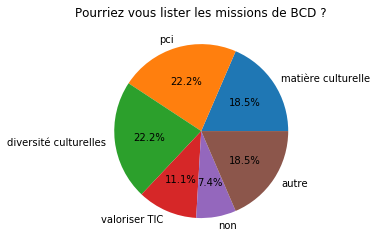

In [93]:
reponses1 = {
    'matière culturelle':5,
    'pci':6,
    'diversité culturelles':6,
    'valoriser TIC':3,
    'non':2,
    'autre':5
}

plt.pie(reponses1.values(), labels=reponses1.keys(),autopct='%1.1f%%');
plt.title(df[q1].name)
display(DictTable(tri_dico(reponses1)))
print('NB : Attention aux écarts de % sur de petits effectifs')

2 personnes ne peuvent pas répondre.

## Q2 : _Pourriez-vous nommer les sites animés par BCD ?_
Les réponses attendues sont :
- BCD
- Bazhvalan
- Bécédia
- BED
- PCI  
- Bretania

In [90]:
q2 = 'Pourriez-vous nommer les sites animés par BCD ?'
print(f"Nombre de réponses : {len(df[q2].dropna())}")

Nombre de réponses : 10


In [94]:
for reponse in df[q2].dropna().values:
    print(reponse)
    print('---')

Bazhalan becedia bed pci bretania
---
Non
---
bretania
bed
pci
TAP
Bécédia
---
Bécédia, Bretania,
---
BCD, Bécédia, Bretania, PCI et BED.
---
BED , Bretania, Bécédia, Bazhvalan, PCI
---
BCD Baltivalan Becedia BED PCI Bretania bien fait pour un novice car repris en haut de la page lorsque l on navigue
---
PCI / Bretania / Bed / Bécédia
---
Becedia, Bazhvalan
---
bretania, bed, bécédia, bazhvalan, pci
---


Bécédia,8
Bretania,8
Bed,7
PCI,7
Bazvalan,3
BCD,2
TAP,1
non,1


NB : Attention aux écarts de % sur de petits effectifs


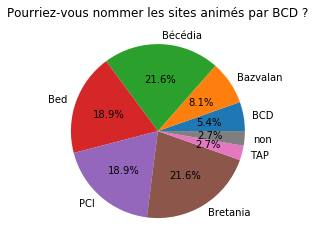

In [95]:
reponses2 = {
    'BCD':2,
    'Bazvalan':3,
    'Bécédia':8,
    'Bed':7,
    'PCI':7,
    'Bretania':8,
    'TAP':1,
    'non':1
}
plt.pie(reponses2.values(), labels=reponses2.keys(),autopct='%1.1f%%');
plt.title(df[q2].name)
display(DictTable(tri_dico(reponses2)))
print('NB : Attention aux écarts de % sur de petits effectifs')

## Q3 : _Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?_
Les réponses attendues : Bretania et PCI

In [96]:
q3 = 'Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?'
print(f"Nombre de réponses : {len(df[q3].dropna())}")

Nombre de réponses : 10


In [97]:
for reponse in df[q3].dropna().values:
    print(reponse)
    print('---')

PCI
---
Je ne sais pas
---
pci
---
Bretania
---
Bretania et PCI
---
Bretania
---
cliquer sur les trois traits en haut à droite
---
site PCI / Site Bretania
---
Je ne sais pas
---
pci
---


PCI,5
Bretania,4
non,2
autre,1


NB : Attention aux écarts de % sur de petits effectifs


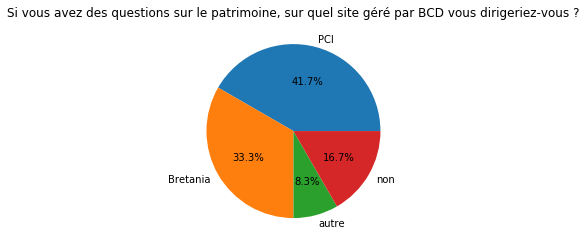

In [98]:
reponses3 = {
    'PCI':5,
    'Bretania':4,
    'autre':1,
    'non':2
}
plt.pie(reponses3.values(), labels=reponses3.keys(),autopct='%1.1f%%');
plt.title(df[q3].name)
display(DictTable(tri_dico(reponses3)))
print('NB : Attention aux écarts de % sur de petits effectifs')

## Q4 : _Si vous aviez des questions sur l'histoire de Bretagne, sur quel site de BCD iriez-vous faire des recherches ?_
La réponse attendue est : Bécédia

In [102]:
q4 = "Si vous aviez des questions sur l'histoire de Bretagne, \
sur quel site de BCD iriez-vous faire des recherches ?"
print('Nombre de réponses : {}'.format(len(df[q4].dropna())))

Nombre de réponses : 10


In [103]:
for reponse in df[q4].dropna().values:
    print(reponse)
    print('---')

Becedia
---
Je ne sais pas
---
Bécédia
---
Bécédia
---
BCD, Bretania et PCI . En fait, tout dépend de la thématique et du type de média recherché (?)
---
Bretania
---
site projects
---
Site Bécédia
---
Je ne sais pas
---
bécédia
---


Bécédia,5
Bretania,2
non,2
BCD,1
PCI,1
autre,1


NB : Attention aux écarts de % sur de petits effectifs


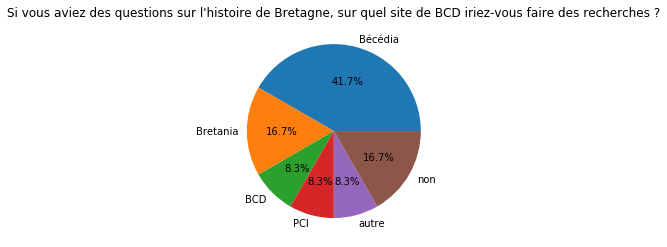

In [104]:
reponses4 = {
    'Bécédia':5,
    'Bretania':2,
    'BCD':1,
    'PCI':1,
    'autre':1,
    'non':2
}
plt.pie(reponses4.values(), labels=reponses4.keys(),autopct='%1.1f%%');
plt.title(df[q4].name)
display(DictTable(tri_dico(reponses4)))
print('NB : Attention aux écarts de % sur de petits effectifs')

## Q5 : _Comment avez-vous trouvé la navigation sur le site de BCD ? Facile, compliqué etc..._

In [105]:
q5 = "Comment avez-vous trouvé la navigation sur le site de BCD ? Facile, compliqué etc..."
print('Nombre de réponses : {}'.format(len(df[q5].dropna())))

Nombre de réponses : 10


In [106]:
for reponse in df[q5].dropna().values:
    print(reponse)
    print('---')

Facile, petit bémol sur la liste des sites de BCD, c’est écrit trop petit.
---
Correcte, malgré quelques anomalies mineures (ex : selon les cas, le changement de page génère ou non un nouvel onglet).
---
Simple, fluide.
Information facile d'acces
Style épuré
---
Facile
---
A la fois très facile et agréable pour une découverte générale et un peu compliquée, à dire vrai, pour la recherche d'un sujet précis.
---
pas assez intuitive
---
Facile peut être préciser pour les novices de façon bref à côté d association projects etc ...un mot clef exemple patrimoine histoire actions BCD etc....
---
facile
Beaucoup d'informations
---
C'est difficile, je ne sais où sont les choses. Il y  a des éléments que j'ai déjà vu sur le site mais il m'est difficile de les retrouver.
---
la navigation n'est pas facile car le site et ses rubriques est plutôt dense. La distinction entre les différents sites ; bécédia, bretania n'est pas évidente. J'ai pu répondre aux questions précédentes en cliquant sur chacun 

positif,7
negatif,3


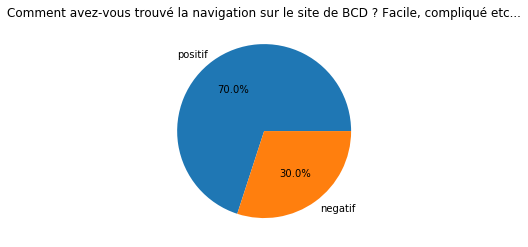

In [107]:
reponses5 = {
    'positif':7,
    'negatif':3
}
plt.pie(reponses5.values(), labels=reponses5.keys(),autopct='%1.1f%%');
plt.title(df[q5].name)
display(DictTable(tri_dico(reponses5)))

__Points négatifs__ :
- Bandeau des sites trop petit
- Pas de cohérence pour les liens (_blank, _parent etc.)
- Peu intuitif
- Difficile de trouver, et retrouver les infos
- Information trop dense
- Difficulté à comprendre le rôle de chaque site
- Recherche compliqué

__Points positifs__ :
- Simplicité
- Fluidité
- Facile
- Visuellement agréable

## Q6 : _Pourriez-vous citer une action menée par BCD ?_

In [108]:
q6 = "Pourriez-vous citer une action menée par BCD ?"
print('Nombre de réponses : {}'.format(len(df[q6].dropna())))

Nombre de réponses : 10


In [109]:
for reponse in df[q6].dropna().values:
    print(reponse)
    print('---')

Intervention auprès du public (dessin animé pour les jeunes, formation, expositions...)
---
Je n'ai pas pris le temps d'approfondir le contenu, car je me suis concentré sur l'ergonomie.
---
Mise en place d’actions d’inventaire, de valorisation et de promotion en partenariat avec les personnes ressources du territoire.
---
Bazhvalan : mise en relation de brittophones de naissance et d'apprenants
---
Les conférences d'histoire (les âges d'or de la Bretagne)
---
emission radio Sevennadurioù
---
les actions BCD sont reprises dans qui sommes nous
---
Action de formation à destination des personnels encadrant de jeunes enfants
---
La création de "Spot".
---
la mise en place de l'exposition itinérante "bretagne et diversité".
---


animation,1
non,1
inventaire,1
bazhvalan,1
conférences age d'or,1
radio,1
formation,1
vidéos,1
expositions,1


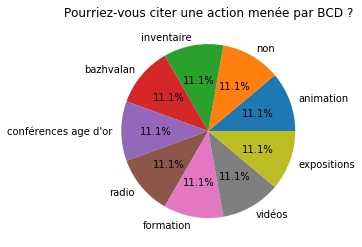

In [110]:
reponses6 = {
    'animation':1,
    'non':1,
    'inventaire':1,
    'bazhvalan':1,
    'conférences age d\'or':1,
    'radio':1,
    'formation':1,
    'vidéos':1,
    'expositions':1
}
plt.pie(reponses6.values(), labels=reponses6.keys(),autopct='%1.1f%%');
plt.title(df[q6].name)
display(DictTable(tri_dico(reponses6)))

Les réponses sont très "dispersées", il n'y a pas __une__ action qui ressort

## Q7 : _Les termes utilisés sur le site vous paraissent-ils clairs ?_

In [111]:
q7 = "Les termes utilisés sur le site vous paraissent-ils clairs ?"
print('Nombre de réponses : {}'.format(len(df[q7].dropna())))

Nombre de réponses : 10


In [112]:
for reponse in df[q7].dropna().values:
    print(reponse)
    print('---')

Oui
---
Non
---
Oui
---
Oui
---
Oui
---
Oui
---
Oui
---
Oui
---
Oui
---
Non
---


oui,8
non,2


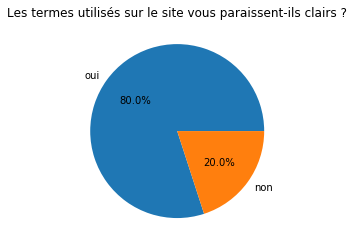

In [114]:
reponses7 = {
    'oui':df[q7].value_counts()[0],
    'non':df[q7].value_counts()[1]
}
plt.pie(reponses7.values(), labels=reponses7.keys(),autopct='%1.1f%%');
plt.title(df[q7].name)
display(DictTable(tri_dico(reponses7)))

## Q8 : _Lesquels vous paraissent peu explicites ?_

In [115]:
q8 = "Lesquels vous paraissent peu explicites ?"
print('Nombre de réponses : {}'.format(len(df[q8].dropna())))

Nombre de réponses : 1


In [116]:
for reponse in df[q8].dropna().values:
    print(reponse)
    print('---')

Tout
---


## Q9 : _Regardez-vous la page Actualités ?_

In [117]:
q9 = "Regardez-vous la page Actualités ?"
print('Nombre de réponses : {}'.format(len(df[q9].dropna())))

Nombre de réponses : 10


In [118]:
for reponse in df[q9].dropna().values:
    print(reponse)
    print('---')

Oui
---
Non
---
Oui
---
Non
---
Oui
---
Oui
---
Oui
---
Oui
---
Non
---
Non
---


oui,6
non,4


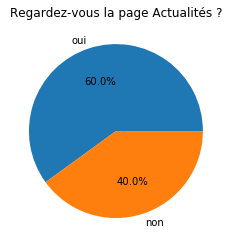

In [119]:
reponses9 = {
    'oui':df[q9].value_counts()[0],
    'non':df[q9].value_counts()[1]
}
plt.pie(reponses9.values(), labels=reponses9.keys(),autopct='%1.1f%%');
plt.title(df[q9].name)
display(DictTable(tri_dico(reponses9)))

## Q10 : _Regardez-vous le Slider ?_

In [120]:
q10 = "Regardez-vous le Slider ?"
print('Nombre de réponses : {}'.format(len(df[q10].dropna())))

Nombre de réponses : 10


In [121]:
for reponse in df[q10].dropna().values:
    print(reponse)
    print('---')

Non
---
Non
---
Non
---
Oui
---
Oui
---
Oui
---
Non
---
Non
---
Non
---
Oui
---


oui,6
non,4


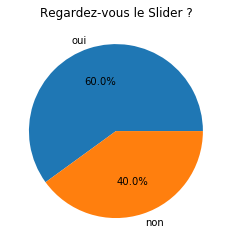

In [122]:
reponses10 = {
    'oui':df[q10].value_counts()[0],
    'non':df[q10].value_counts()[1]
}
plt.pie(reponses10.values(), labels=reponses10.keys(),autopct='%1.1f%%');
plt.title(df[q10].name)
display(DictTable(tri_dico(reponses10)))

## Q11 : _Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site._

In [180]:
q11 = "Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site"
df[df.columns[17:-1]]

,Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 1],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 2],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 3],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 4],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 5],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 6],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 7]
0,Les différentes actions de BCD,Les partenaires,Les projets en cours,Le projet associatif,Les différents sites de BCD,Les salariés de l'association,NaN
2,Les différents sites de BCD,Les différentes actions de BCD,NaN,NaN,NaN,NaN,NaN
4,Les projets en cours,Le projet associatif,Les différentes actions de BCD,Les différents sites de BCD,Les partenaires,Les comptes rendus des assemblées générales,Les salariés de l'association
5,Les différentes actions de BCD,Le projet associatif,Les projets en cours,Les salariés de l'association,Les comptes rendus des assemblées générales,Les partenaires,Les différents sites de BCD
7,Les différents sites de BCD,Les différentes actions de BCD,Les partenaires,Le projet associatif,Les projets en cours,Les salariés de l'association,Les comptes rendus des assemblées générales
8,Les différents sites de BCD,Les différentes actions de BCD,Les projets en cours,Les partenaires,Le projet associatif,Les salariés de l'association,Les comptes rendus des assemblées générales
9,Les différents sites de BCD,Les projets en cours,Le projet associatif,Les différentes actions de BCD,Les partenaires,Les salariés de l'association,Les comptes rendus des assemblées générales
11,Les différents sites de BCD,Les projets en cours,Le projet associatif,Les différentes actions de BCD,Les partenaires,Les salariés de l'association,Les comptes rendus des assemblées générales
12,Le projet associatif,Les projets en cours,Les différents sites de BCD,Les différentes actions de BCD,Les salariés de l'association,Les partenaires,Les comptes rendus des assemblées générales
13,Les différentes actions de BCD,Les projets en cours,Les salariés de l'association,NaN,NaN,NaN,NaN


In [176]:
reponses11 = {
    'Les différents sites de BCD':0,
    'Les différentes actions de BCD':0,
    'Le projet associatif':0,
    'Les projets en cours':0,
    'Les partenaires':0,
    "Les salariés de l'association":0,
    'Les comptes rendus des assemblées générales':0
}
tx = 7
for i in range(17,24):
    for v in df[df.columns[i]]:
        if v in reponses11:
            reponses11[v] += tx
    tx -= 1

Les différentes actions de BCD,62
Les différents sites de BCD,55
Les projets en cours,54
Le projet associatif,43
Les partenaires,32
Les salariés de l'association,24
Les comptes rendus des assemblées générales,12


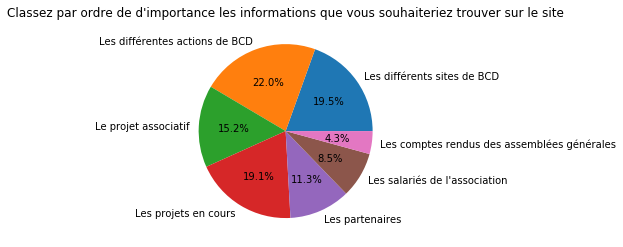

In [182]:
plt.pie(reponses11.values(), labels=reponses11.keys(),autopct='%1.1f%%');
plt.title(q11)
display(DictTable(tri_dico(reponses11)))

## Q12 : _Commentaires libres_

In [184]:
q12 = "Commentaires libres"
print('Nombre de réponses : {}'.format(len(df[q12].dropna())))

Nombre de réponses : 5


In [185]:
for reponse in df[q12].dropna().values:
    print(reponse)
    print('---')

Je n'ai rien à ajouter, je viendrai plus souvent sur le site.
---
Merci de votre sollicitation et plein de succès pour ce travail d'amélioration!
---
Valoriser le rôle et la spécificité des chaque site et les projets en cours
---
Pouvez-vous mettre une annotation pour le terme slider n ayant pas été avec un ordinateur dans les mains je ne connaissais pas ce terme de plus sur Google plusieurs significations . J espère que les réponses vous aiderons bonne journée cordialement
---
A mon avis il serait préférable de classer les documents par thèmes au lieu de tout avoir sur le même site. Il est compliqué de comprendre ce qu’il y a dans les différents sites Bécédia, Bretania, BED, PCI… et où sont les choses. J’ai trouvé un tas de choses intéressantes sur le site mais il est quasi impossible de les retrouver par la suite. Rien à voir avec le site, mais il serait intéressant d’ouvrir les portes de BCD, en recevant du monde, organisant des événements et/ou expositions pour mettre en lumière vo